In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [78]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [79]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=10, shuffle=True)

In [80]:
testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=10, shuffle=False)

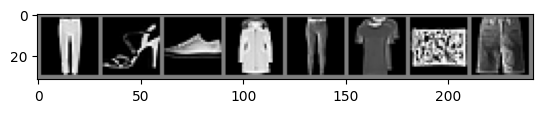

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img*0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))  
    break

In [82]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,10)
)
model = model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


In [83]:
input_tensor = torch.rand(5,28,28).to(device)
input_tensor.shape

torch.Size([5, 28, 28])

In [84]:
output = model(input_tensor)
output.shape

torch.Size([5, 10])

In [85]:
compute_loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)


In [86]:
def evaluate(model,testloader,compute_loss):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    # Với torch.no_grad() để tắt tính toán gradient trong quá trình đánh giá
    with torch.no_grad():
        for images,labels in testloader:
            images,labels = images.to(device),labels.to(device)
            
            output = model(images)# Forward pass
            loss = compute_loss(output,labels)
            test_loss += loss.item()
            
            _, pedict = torch.max(output.data,1) # Lấy lớp có giá trị dự đoán cao nhất
            total += labels.size(0) # Tổng số mẫu
            correct += (pedict==labels).sum().item() # Số mẫu dự đoán đúng
    
    accuracy = 100* correct/total
    test_loss = test_loss/ len(testloader)
    return test_loss,accuracy

In [87]:
test_loss, test_accuracy = evaluate(model, testloader, compute_loss)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 2.318794584274292
test_accuracy: 10.34


In [88]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
epochs = 20

In [89]:
for i in range(epochs):
    losses = 0.0
    correct = 0
    total = 0
    
    for j,(inputs,labels) in enumerate(trainloader,0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        output = model(inputs)
        loss = compute_loss(output,labels)
        losses += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(output.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_accuracy = 100*correct/total
    epoch_loss = losses / (i+1)
    
    test_loss,test_accuracy = evaluate(model,testloader,compute_loss)
    print(f"Epoch [{i + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
        

Epoch [1/20], Loss: 108.5447, Accuracy: 51.97%, Test Loss: 1.4580, Test Accuracy: 65.15%
Epoch [2/20], Loss: 36.3341, Accuracy: 69.27%, Test Loss: 1.0715, Test Accuracy: 70.57%
Epoch [3/20], Loss: 19.0171, Accuracy: 72.27%, Test Loss: 0.9017, Test Accuracy: 72.39%
Epoch [4/20], Loss: 12.4039, Accuracy: 73.83%, Test Loss: 0.8125, Test Accuracy: 73.85%
Epoch [5/20], Loss: 9.0727, Accuracy: 75.00%, Test Loss: 0.7567, Test Accuracy: 74.67%
Epoch [6/20], Loss: 7.0992, Accuracy: 75.86%, Test Loss: 0.7191, Test Accuracy: 75.69%
Epoch [7/20], Loss: 5.7973, Accuracy: 76.55%, Test Loss: 0.6908, Test Accuracy: 76.16%
Epoch [8/20], Loss: 4.8808, Accuracy: 77.25%, Test Loss: 0.6681, Test Accuracy: 76.89%
Epoch [9/20], Loss: 4.2016, Accuracy: 77.88%, Test Loss: 0.6495, Test Accuracy: 77.52%
Epoch [10/20], Loss: 3.6742, Accuracy: 78.47%, Test Loss: 0.6339, Test Accuracy: 77.93%
Epoch [11/20], Loss: 3.2582, Accuracy: 78.99%, Test Loss: 0.6204, Test Accuracy: 78.32%
Epoch [12/20], Loss: 2.9233, Accurac

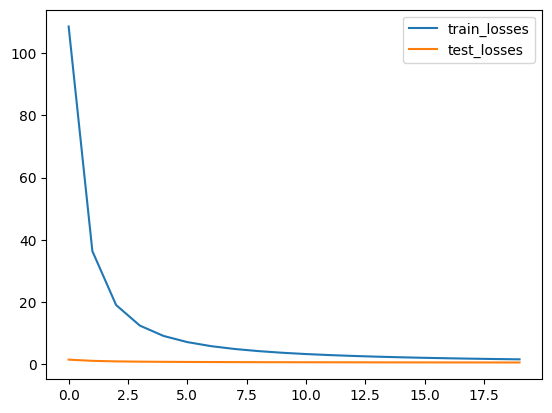

In [90]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

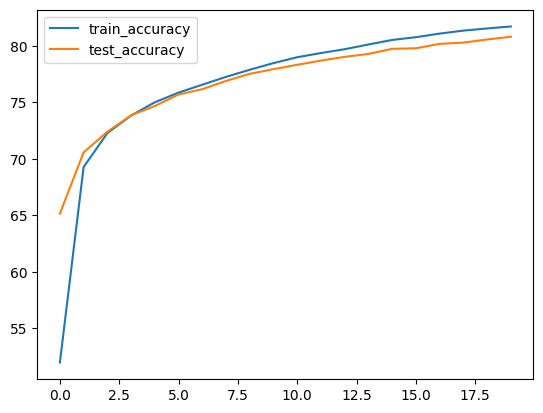

In [91]:
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()

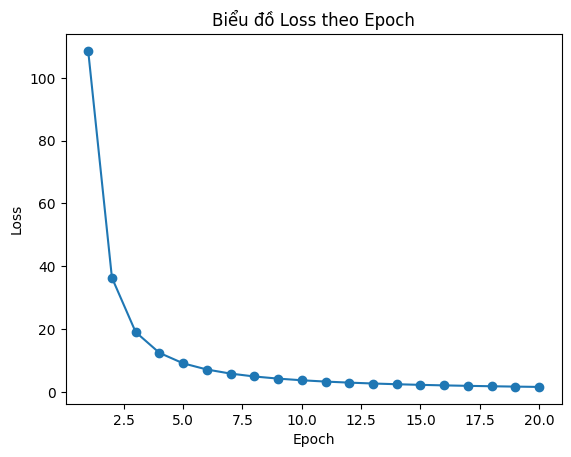

In [92]:
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title('Biểu đồ Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

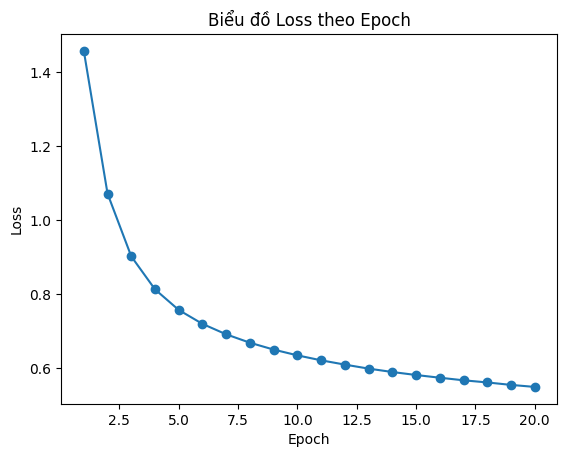

In [93]:
plt.plot(range(1, epochs+1), test_losses, marker='o')
plt.title('Biểu đồ Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

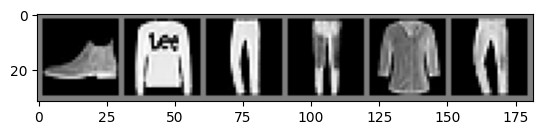

Label thực:         9     2     1     1     6     1
Label dự đoán:      9     2     1     1     6     1


In [95]:
# Lấy một số mẫu từ tập kiểm thử
dataiter = iter(testloader)
images, labels = next(dataiter)

# Dự đoán với mô hình đã huấn luyện
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Hiển thị hình ảnh cùng với label thực và dự đoán
imshow(torchvision.utils.make_grid(images[:6]))
print('Label thực:    ', ' '.join('%5s' % labels[j].item() for j in range(6)))
print('Label dự đoán: ', ' '.join('%5s' % predicted[j].item() for j in range(6)))

Độ cao cực đại: 10.20 m
Tầm bay xa: 40.82 m
Thời gian bay: 2.89 s


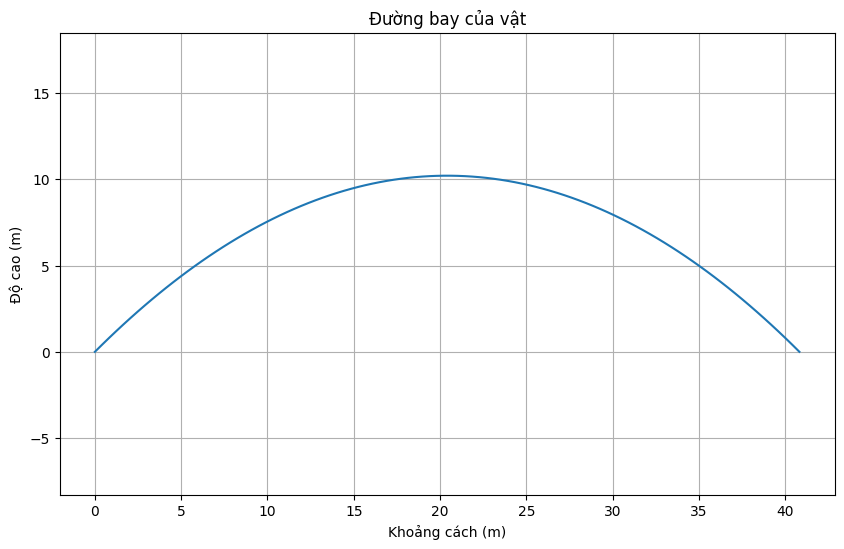

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def projectile_motion(v0, angle_deg, initial_height=0, g=9.8):
    """
    Mô phỏng chuyển động ném xiên
    
    Parameters:
    - v0: Vận tốc ban đầu (m/s)
    - angle_deg: Góc ném (độ)
    - initial_height: Độ cao ban đầu (m)
    - g: Gia tốc trọng trường (m/s²)
    
    Returns:
    - x: Mảng tọa độ x
    - y: Mảng tọa độ y
    - time: Mảng thời gian
    """
    # Chuyển đổi góc từ độ sang radian
    angle_rad = np.deg2rad(angle_deg)
    
    # Tách vận tốc theo phương x và y
    vx = v0 * np.cos(angle_rad)
    vy = v0 * np.sin(angle_rad)
    
    # Tính thời gian bay
    # Sử dụng công thức: 2 * vy / g + sqrt((2*vy/g)² + 2*initial_height/g)
    flight_time = (vy + np.sqrt(vy**2 + 2*g*initial_height)) / g
    
    # Tạo mảng thời gian
    time = np.linspace(0, flight_time, 100)
    
    # Tính tọa độ x và y
    x = vx * time
    y = initial_height + vy * time - 0.5 * g * time**2
    
    return x, y, time

def plot_trajectory(x, y, title="Đường bay của vật"):
    """Vẽ đồ thị quỹ đạo bay"""
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('Khoảng cách (m)')
    plt.ylabel('Độ cao (m)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Ví dụ sử dụng
def main():
    # Các tham số ban đầu
    initial_velocity = 20  # m/s
    launch_angle = 45      # độ
    initial_height = 0     # m

    # Tính toán quỹ đạo
    x, y, time = projectile_motion(
        v0=initial_velocity, 
        angle_deg=launch_angle, 
        initial_height=initial_height
    )

    # Tính một số thông số
    max_height = np.max(y)
    max_distance = x[-1]
    flight_duration = time[-1]

    # In kết quả
    print(f"Độ cao cực đại: {max_height:.2f} m")
    print(f"Tầm bay xa: {max_distance:.2f} m")
    print(f"Thời gian bay: {flight_duration:.2f} s")

    # Vẽ đồ thị
    plot_trajectory(x, y)

# Chạy chương trình chính
if __name__ == "__main__":
    main()